### Import Library

In [26]:
!pip install empiricaldist

In [27]:
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from empiricaldist import Pmf, Cdf
import plotly.express as px

from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Read Data

In [28]:
data = pd.read_csv('/content/BankChurners.csv')
data = data.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'],axis=1)
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


### Analisis PMF pada kolom Attrition Flag

In [41]:
Pmf.from_seq(data['Attrition_Flag'],normalize = True)

,probs
Attrited Customer,0.16066
Existing Customer,0.83934


In [50]:
PMF = Pmf.from_seq(data['Attrition_Flag'],normalize = True)
PMF = pd.DataFrame({'Attrition_Flag':PMF.index, "PMF":PMF.values})
px.bar(PMF, x='Attrition_Flag', y='PMF', width=400, height=350)

### Memisahkan Data Existing dan Attrited Customer

In [31]:
existing = data.loc[(data['Attrition_Flag'] == 'Existing Customer')]
attrited = data.loc[(data['Attrition_Flag'] == 'Attrited Customer')]

### Analisis Distribusi


In [87]:
data['Total_Trans_Amt'].describe()

count    10127.000000
mean      4404.086304
std       3397.129254
min        510.000000
25%       2155.500000
50%       3899.000000
75%       4741.000000
max      18484.000000
Name: Total_Trans_Amt, dtype: float64

In [86]:
data['Total_Trans_Amt'].mode()

0    4253
1    4509
dtype: int64

In [105]:
data['Total_Trans_Amt'].skew()

2.0410034025756936

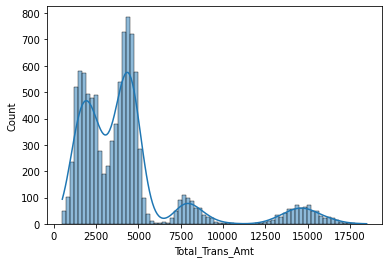

In [85]:
sns.histplot(data= data, x = 'Total_Trans_Amt', kde=True)
plt.show()
"""Distribusi data Total_Trans_Amt adalah Double Peaked dan Right Skewed
dengan mode:4253 & 4509 , median: 3899, mean: 4404.08 dan nilai skew: 2.04"""

In [101]:
data['Total_Trans_Ct'].describe()

count    10127.000000
mean        64.858695
std         23.472570
min         10.000000
25%         45.000000
50%         67.000000
75%         81.000000
max        139.000000
Name: Total_Trans_Ct, dtype: float64

In [102]:
data['Total_Trans_Ct'].mode()

0    81
dtype: int64

In [104]:
data['Total_Trans_Ct'].skew()

0.15367306849872275

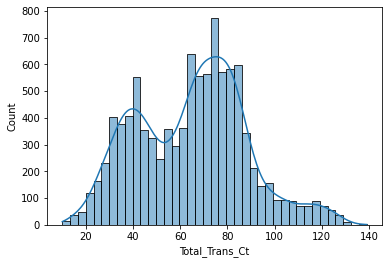

In [56]:
sns.histplot(data= data, x = 'Total_Trans_Ct', kde=True)
plt.show()

"""Distribusi data Total_Trans_Ct adalah Bimodal dan hampir Normal
karena memiliki mean: 64 < median: 67 < mode:81 dan nilai skew: 0.15 """

### Korelasi

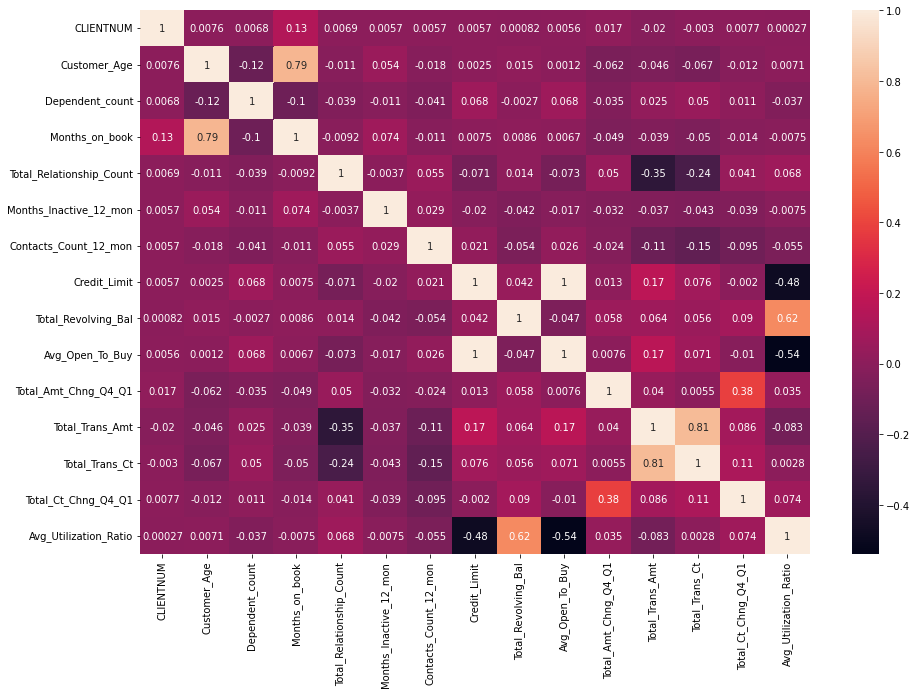

In [117]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot = True)
plt.show()

#Korelasi antara Total_Trans_Amt dan Total_Trans_Ct cukup kuat